#  Basic ARIMA Implementation

In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv', header=0, index_col=0)

In [7]:
model = ARIMA(data, order=(5, 1, 0))  # p=5, d=1, q=0
model_fit = model.fit()

/home/sumeet/code/MachineLearningProjects/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sumeet/code/MachineLearningProjects/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sumeet/code/MachineLearningProjects/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sumeet/code/MachineLearningProjects/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarn

In [8]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Thu, 08 Aug 2024   AIC                            408.969
Time:                        07:38:20   BIC                            418.301
Sample:                             0   HQIC                           412.191
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

In [9]:
forecast = model_fit.forecast(steps=10)
print(forecast)

36    561.113738
37    671.054470
38    554.031815
39    679.972138
40    601.711133
41    633.764693
42    639.430680
43    613.756567
44    660.395041
45    606.548067
Name: predicted_mean, dtype: float64


/home/sumeet/code/MachineLearningProjects/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sumeet/code/MachineLearningProjects/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


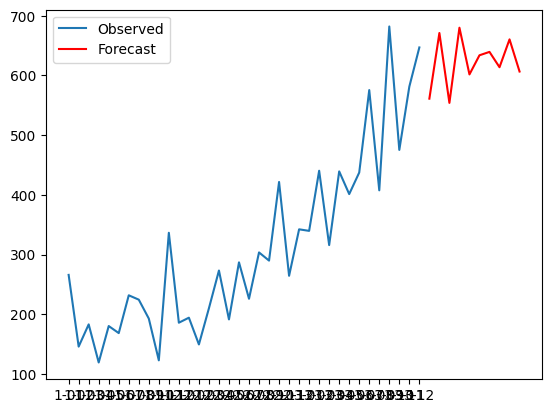

In [10]:
plt.plot(data, label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()

#  Walk-Forward Validation

In [11]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot as plt

In [14]:
series = pd.read_csv('dataset/shampoo/shampoo_sales.csv', header=0, parse_dates=True, index_col=0)

/tmp/ipykernel_287052/2694700374.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series = pd.read_csv('dataset/shampoo/shampoo_sales.csv', header=0, parse_dates=True, index_col=0)


In [17]:
X = series.values

In [18]:
# Split into train and test sets
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()


In [19]:
for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

/tmp/ipykernel_287052/1606758286.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=343.272180, expected=342.300000
predicted=293.329674, expected=339.700000
predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220221, expected=439.300000
predicted=357.645324, expected=401.300000
predicted=443.047835, expected=437.400000
predicted=378.365674, expected=575.500000
predicted=459.415021, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231275, expected=475.300000
predicted=672.914944, expected=581.300000
predicted=531.541449, expected=646.900000


Test RMSE: 89.021


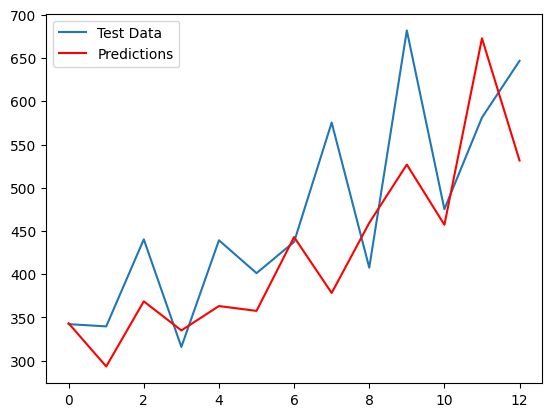

In [20]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# Plot forecasts against actual outcomes
plt.plot(test, label='Test Data')
plt.plot(predictions, color='red', label='Predictions')
plt.legend()
plt.show()


/tmp/ipykernel_287052/1933404825.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('dataset/shampoo/shampoo_sales.csv', header=0, parse_dates=True, index_col=0)


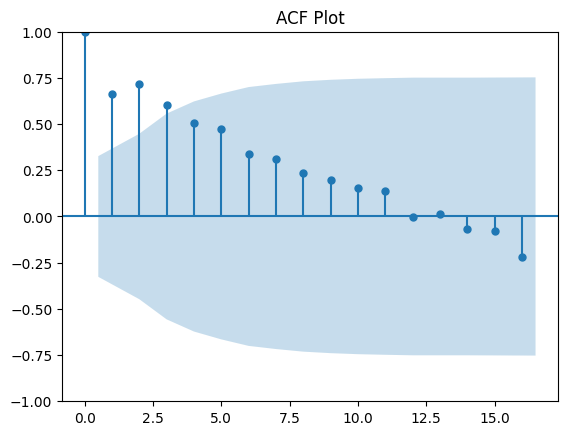

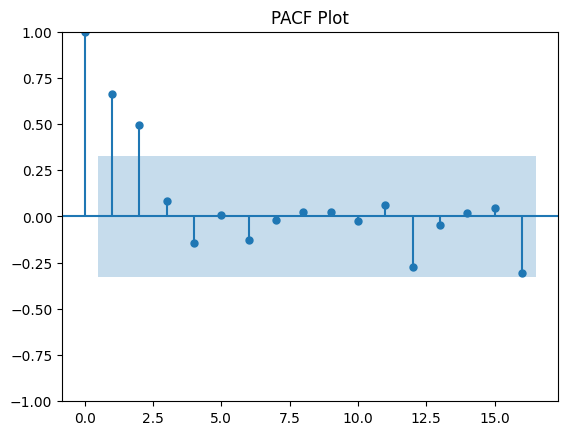

/home/sumeet/code/MachineLearningProjects/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sumeet/code/MachineLearningProjects/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sumeet/code/MachineLearningProjects/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sumeet/code/MachineLearningProjects/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarn

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -199.556
Date:                Thu, 08 Aug 2024   AIC                            407.112
Time:                        07:48:20   BIC                            413.334
Sample:                             0   HQIC                           409.260
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6661      0.167     -9.966      0.000      -1.994      -1.338
ar.L2         -0.7467      0.153     -4.882      0.000      -1.046      -0.447
ma.L1          0.9998     55.743      0.018      0.9

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Load dataset
data = pd.read_csv('dataset/shampoo/shampoo_sales.csv', header=0, parse_dates=True, index_col=0)

# Plot ACF and PACF
plot_acf(data)
plt.title('ACF Plot')
plt.show()

plot_pacf(data)
plt.title('PACF Plot')
plt.show()

# Fit ARIMA model based on ACF and PACF analysis
model = ARIMA(data, order=(2, 1, 1))  # Example parameters based on analysis
model_fit = model.fit()
print(model_fit.summary())

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA parameters
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 0, 12)  # (P, D, Q, s)

# Fit the SARIMA model
model = SARIMAX(data, order=order, seasonal_order=seasonal_order)
results = model.fit()

# Make predictions
predictions = results.predict(start=len(data), end=len(data)+10)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.89195D+00    |proj g|=  9.04079D-02

At iterate    5    f=  3.86541D+00    |proj g|=  1.31827D-03

At iterate   10    f=  3.86219D+00    |proj g|=  2.77049D-02

At iterate   15    f=  3.85366D+00    |proj g|=  8.20045D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     20      1     0     0   9.990D-06   3.854D+00
  F =   3.8536609814827592     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/home/sumeet/code/MachineLearningProjects/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sumeet/code/MachineLearningProjects/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sumeet/code/MachineLearningProjects/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/sumeet/code/MachineLearningProjects/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarn